In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score #all comes under classification_report

import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv("titanic_train.csv") 

In [86]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
data.shape

(891, 12)

# Analysis Of Data

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
# Here in this analysis the cabin having only 204 out of 900

In [91]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Missing Values 

In [94]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [96]:
# Drop Or fillna the age gap like shown 19.8% age is missing so fill it by data.age.mean

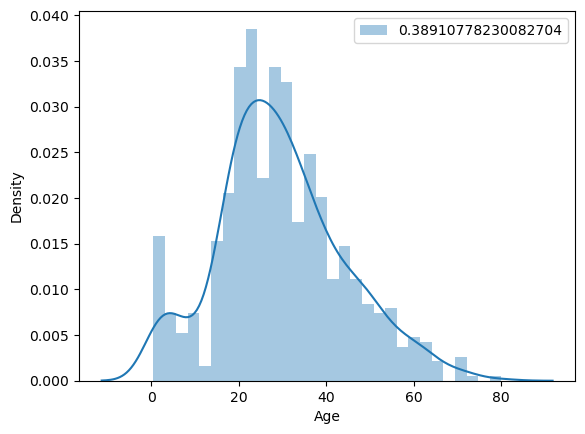

In [97]:
sns.distplot(data['Age'], bins=30, label=data['Age'].skew())
plt.legend()

In [98]:
data.Age.mean()

29.69911764705882

In [99]:
data.Age.median()

28.0

In [100]:
data['Age'].fillna(data.Age.mean(), inplace=True)

In [101]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

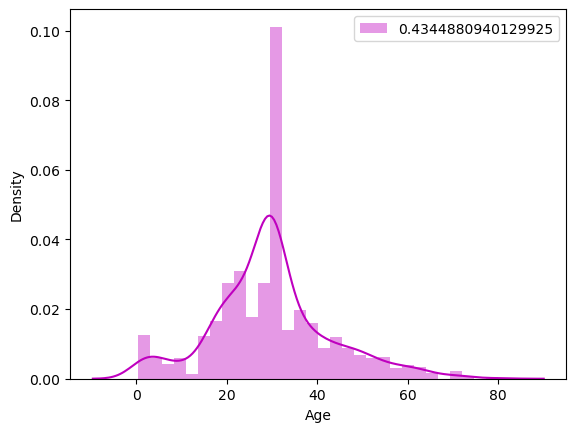

In [102]:
sns.distplot(data['Age'], bins=30, label=data['Age'].skew(), color="m")
plt.legend()

In [103]:
def attribute_info(df_col):
    
    print(f'Description Of attributes: /n /n {df_col.describe()}/n')
    print(f'Value Count : /n /n {df_col.value_counts()}/n')
    print(f'Unique Number : /n /n {df_col.unique()}/n')
    print(f'Missing Values : /n /n {df_col.isnull().sum()}/n')
    print(f'Missing Values in %: /n /n {df_col.isnull().mean()}/n')

In [104]:
for col in data:
    print(f"\033[1m---------------------{col}--------------------------\033[0m")
    print("\n \n")
    attribute_info(data[col])
    print()

---------------------PassengerId--------------------------

 

Description Of attributes: /n /n count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64/n
Value Count : /n /n PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64/n
Unique Number : /n /n [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 12

In [105]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [106]:
data["Gender"] = data["Sex"].map({'male':0, 'female':1})

In [107]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [108]:
data["Embarked"] = data["Embarked"].map({'S':0, 'C':1, 'Q':2})

In [109]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1


# Drop Irrelavant features

In [111]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

In [112]:
data.shape

(891, 13)

In [113]:
data.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
data.shape

(891, 8)

In [115]:
data[:5]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,1,3,26.0,0,0,7.9250,0.0,1
3,1,1,35.0,1,0,53.1000,0.0,1
4,0,3,35.0,0,0,8.0500,0.0,0


In [116]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Gender      0
dtype: int64

In [117]:
data.dropna(inplace=True) #Drop data manually of embarked 

In [118]:
data.shape

(889, 8)

In [119]:
data[:3]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,1,3,26.0,0,0,7.9250,0.0,1


In [120]:
data.duplicated().sum()

111

In [121]:
data[data.duplicated()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
47,1,3,29.699118,0,0,7.7500,2.0,1
76,0,3,29.699118,0,0,7.8958,0.0,0
77,0,3,29.699118,0,0,8.0500,0.0,0
87,0,3,29.699118,0,0,8.0500,0.0,0
95,0,3,29.699118,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
870,0,3,26.000000,0,0,7.8958,0.0,0
877,0,3,19.000000,0,0,7.8958,0.0,0
878,0,3,29.699118,0,0,7.8958,0.0,0
884,0,3,25.000000,0,0,7.0500,0.0,0


In [122]:
data.shape

(889, 8)

In [123]:
data.drop_duplicates(keep='first', inplace=True)  

In [124]:
data.shape # Every Duplicate data delete 111 and not repeatation allowed and only one will stay

(778, 8)

# Corelation

In [126]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
Survived,1.000000,-0.333291,-0.084185,-0.036044,0.071352,0.244700,0.078946,0.511686
Pclass,-0.333291,1.000000,-0.335180,0.085055,0.037218,-0.551236,0.015791,-0.113210
Age,-0.084185,-0.335180,1.000000,-0.279150,-0.185872,0.087692,0.011797,-0.099034
SibSp,-0.036044,0.085055,-0.279150,1.000000,0.380174,0.135490,-0.044142,0.099980
Parch,0.071352,0.037218,-0.185872,0.380174,1.000000,0.192411,-0.071350,0.239210
Fare,0.244700,-0.551236,0.087692,0.135490,0.192411,1.000000,0.087084,0.166952
Embarked,0.078946,0.015791,0.011797,-0.044142,-0.071350,0.087084,1.000000,0.095293
Gender,0.511686,-0.113210,-0.099034,0.099980,0.239210,0.166952,0.095293,1.000000


<Axes: >

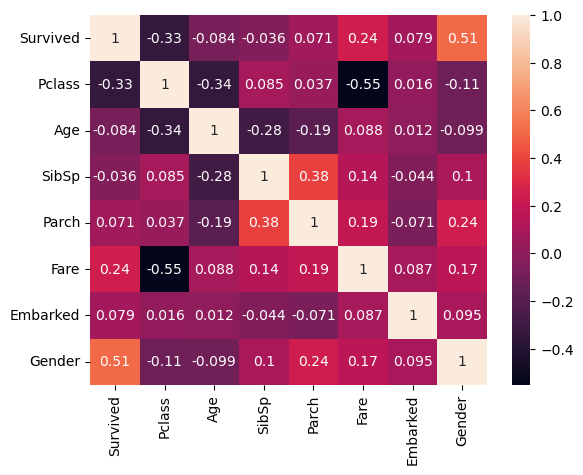

In [127]:
sns.heatmap(data.corr(), annot=True)

# Model Building 

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [130]:
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,1,3,26.0,0,0,7.9250,0.0,1


# Dependent And Independent split

In [132]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [133]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender']]
Y = data['Survived']

In [134]:
X

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,22.000000,1,0,7.2500,0.0,0
1,1,38.000000,1,0,71.2833,1.0,1
2,3,26.000000,0,0,7.9250,0.0,1
3,1,35.000000,1,0,53.1000,0.0,1
4,3,35.000000,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...
885,3,39.000000,0,5,29.1250,2.0,1
887,1,19.000000,0,0,30.0000,0.0,1
888,3,29.699118,1,2,23.4500,0.0,1
889,1,26.000000,0,0,30.0000,1.0,0


In [135]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 778, dtype: int64

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# 0.2 = 20% test data and 80% train data Random State = to fix the accuracy or stable accuracy(fix index position) 

In [137]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
789,1,46.0,0,0,79.2,1.0,0
723,2,50.0,0,0,13.0,0.0,0


In [138]:
Y_train.head(2)

789    0
723    0
Name: Survived, dtype: int64

In [139]:
X_train.value_counts().sum()

622

In [140]:
X_test.value_counts().sum()

156

In [141]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [142]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [143]:
Y_train # actual 

789    0
723    0
142    1
389    1
56     1
      ..
73     0
113    0
288    1
484    1
109    1
Name: Survived, Length: 622, dtype: int64

In [144]:
y_pred_train # prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [145]:
Y_test

677    1
668    0
615    1
729    0
546    1
      ..
383    1
83     0
157    0
363    0
178    0
Name: Survived, Length: 156, dtype: int64

In [146]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0], dtype=int64)

# Evaluation Metrics

### For Training Data

In [149]:
confusion_matrix(Y_train, y_pred_train)

array([[305,  62],
       [ 69, 186]], dtype=int64)

In [150]:
# True +ve  - False +ve
# False -ve - true -ve

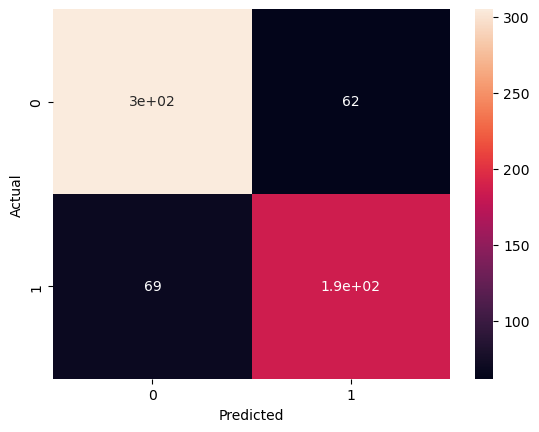

In [151]:
sns.heatmap(confusion_matrix(Y_train, y_pred_train), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
accuracy_score(Y_train, y_pred_train)*100

78.93890675241157

In [153]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       367
           1       0.75      0.73      0.74       255

    accuracy                           0.79       622
   macro avg       0.78      0.78      0.78       622
weighted avg       0.79      0.79      0.79       622



## For Test Data 

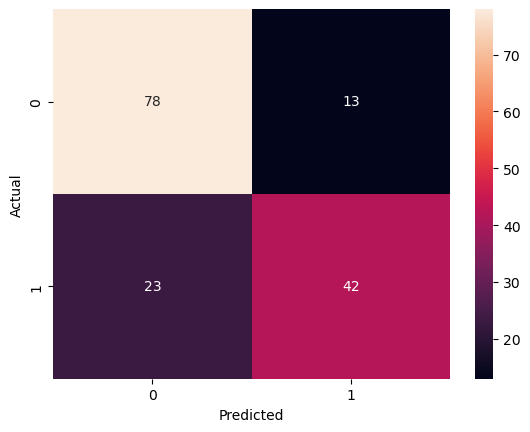

In [155]:
sns.heatmap(confusion_matrix(Y_test, y_pred_test), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
# True +ve  - False +ve
# False -ve - true -ve

In [157]:
accuracy_score(Y_test, y_pred_test)*100

76.92307692307693

In [158]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        91
           1       0.76      0.65      0.70        65

    accuracy                           0.77       156
   macro avg       0.77      0.75      0.76       156
weighted avg       0.77      0.77      0.77       156



In [159]:
## classification_report = accuracy_score, precisio_score, f1_score, recall_score

## Hyper Parameter Tuning With Logistic Regression

In [161]:
from sklearn.model_selection import GridSearchCV  

In [162]:
parameters = {

    'penalty' : ['11', '12', 'elasticnet'],
    'C':        [1.0, 0.1, 0.01, 0.001],
    'solver': ['lbfsg', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

print(parameters)

{'penalty': ['11', '12', 'elasticnet'], 'C': [1.0, 0.1, 0.01, 0.001], 'solver': ['lbfsg', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': [100, 200, 500, 1000]}


In [163]:
classifier = LogisticRegression()

grid_search = GridSearchCV(estimator=classifier, param_grid =parameters, scoring= 'accuracy', cv=5, verbose=3)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END C=1.0, max_iter=100, penalty=11, solver=lbfsg;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=11, solver=lbfsg;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=11, solver=lbfsg;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=11, solver=lbfsg;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=11, solver=lbfsg;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=100, penalty=11, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=11, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=11, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=11, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=11, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1

ValueError: 
All the 1440 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'none' (deprecated), 'l1', 'l2', 'elasticnet'} or None. Got '11' instead.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'none' (deprecated), 'l1', 'l2', 'elasticnet'} or None. Got '12' instead.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'sag', 'newton-cg', 'saga', 'lbfgs', 'newton-cholesky', 'liblinear'}. Got 'lbfsg' instead.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 66, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 56, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 56, in _check_solver
    raise ValueError(
ValueError: Solver newton-cholesky supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 56, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1178, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.


In [164]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['11', '12', 'elasticnet'],
                         'solver': ['lbfsg', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_score_

In [172]:
lr1 = LogisticRegression(C=0.1, max_iter= 200, penalty= 'l1', solver='liblinear')
lr1.fit(X_train, Y_train)


LogisticRegression(C=0.1, max_iter=200, penalty='l1', solver='liblinear')

In [180]:
lr1.score(X_train, Y_train)*100

77.0096463022508

In [178]:
lr1.score(X_test, Y_test)*100

75.64102564102564